In [ ]:
# https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
# https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/

In [1]:
# Import our libraries we are going to use for our data analysis.
#import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('./US(subscriber).csv')
df_origin=df.copy()

us_videos_categories = pd.read_json('./US_category_id.json')
# Map Category IDs using the supporting file: US_category_id.json
categories = {int(category['id']): category['snippet']['title'] for category in us_videos_categories['items']}

In [3]:
tn=df[['thumbnail_link','title','topic','views']]
tn.head()

,thumbnail_link,title,topic,views
0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,748374
1,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,The Trump Presidency: Last Week Tonight with J...,Entertainment,2418783
2,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,3191434
3,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Nickelback Lyrics: Real or Fake?,Entertainment,343168
4,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I Dare You: GOING BALD!?,Entertainment,2095731


In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


Using TensorFlow backend.


In [5]:
# load the model
vmodel = VGG16()

In [6]:
img=tn.thumbnail_link

In [7]:
# load an image from file
image = load_img('default.jpg', target_size=(224,224))

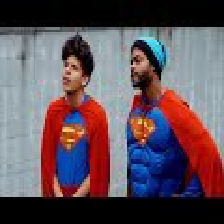

In [8]:
image

In [9]:
# convert the image pixels to a numpy array
image = img_to_array(image)
image

array([[[0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.],
        ...,
        [0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.]],

       [[0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.],
        ...,
        [0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.]],

       [[0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.],
        ...,
        [0., 0., 2.],
        [0., 0., 2.],
        [0., 0., 2.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]], dtype=float32)

In [10]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image

array([[[[0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.],
         ...,
         [0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.]],

        [[0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.],
         ...,
         [0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.]],

        [[0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.],
         ...,
         [0., 0., 2.],
         [0., 0., 2.],
         [0., 0., 2.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.]]]], dtype=float32)

In [11]:
# prepare the image for the VGG model
image = preprocess_input(image)
image

array([[[[-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],

        [[-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],

        [[-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         ...,
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ],
         [-101.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -115.779, -123.68 ],
         [-103.939, -1

In [12]:
# predict the probability across all output classes
yhat = vmodel.predict(image)
yhat

array([[3.65358596e-06, 3.22425825e-04, 2.54360839e-06, 9.22156914e-07,
        5.79854986e-06, 1.16961810e-05, 3.82318922e-06, 3.81319223e-05,
        3.28414217e-06, 2.71426779e-06, 6.99299619e-07, 2.62898288e-06,
        1.19807157e-06, 9.49747630e-07, 1.85656991e-05, 2.40392842e-06,
        1.95643702e-06, 1.02545555e-05, 5.34560013e-06, 1.16737090e-06,
        3.48046740e-07, 1.96486235e-06, 5.05979506e-06, 7.07850131e-06,
        1.91878803e-06, 2.59191233e-06, 3.54742997e-06, 7.95847427e-06,
        6.76531909e-06, 5.66811786e-06, 5.09788208e-07, 5.04738000e-06,
        2.92578852e-06, 9.06015703e-06, 3.89199558e-05, 8.02952286e-07,
        3.96982750e-06, 1.31097045e-06, 6.10791267e-06, 2.93296830e-06,
        8.75418436e-07, 8.01385511e-07, 9.96883500e-06, 5.21991205e-06,
        4.98514964e-07, 1.89888669e-05, 1.37195536e-06, 1.19037777e-05,
        2.47803155e-06, 4.36716437e-06, 5.12425913e-06, 6.60559817e-05,
        1.84798387e-06, 2.02167735e-06, 1.55850489e-06, 8.529577

In [13]:
# convert the probabilities to class labels
label = decode_predictions(yhat)
label

[[('n04418357', 'theater_curtain', 0.16297309),
  ('n04404412', 'television', 0.12442485),
  ('n03782006', 'monitor', 0.060003787),
  ('n10148035', 'groom', 0.0504766),
  ('n02777292', 'balance_beam', 0.03332512)]]

In [14]:
# retrieve the most likely result, e.g. highest probability
label = label[0][:3]

In [15]:
# print the classification
print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))

theater_curtain (16.30%)


In [16]:
label

[('n04418357', 'theater_curtain', 0.16297309),
 ('n04404412', 'television', 0.12442485),
 ('n03782006', 'monitor', 0.060003787)]

In [17]:
vmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### download data link to disk

In [18]:
tn.head()

,thumbnail_link,title,topic,views
0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,748374
1,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,The Trump Presidency: Last Week Tonight with J...,Entertainment,2418783
2,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,3191434
3,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,Nickelback Lyrics: Real or Fake?,Entertainment,343168
4,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I Dare You: GOING BALD!?,Entertainment,2095731


In [19]:
tn.groupby('topic').count()

,thumbnail_link,title,views
topic,,,
Autos & Vehicles,384,384,384
Comedy,3457,3457,3457
Education,1656,1656,1656
Entertainment,9964,9964,9964
Film & Animation,2345,2345,2345
Gaming,817,817,817
Howto & Style,4146,4146,4146
Music,6472,6472,6472
News & Politics,2487,2487,2487


In [20]:
ent=tn[tn['topic'].isin(['Entertainment'])]
new=tn[tn['topic'].isin(['News & Politics'])]
sci=tn[tn['topic'].isin(['Science & Technology'])]
spo=tn[tn['topic'].isin(['Sports'])]
fil=tn[tn['topic'].isin(['Film & Animation'])]
non=tn[tn['topic'].isin(['Nonprofits & Activism'])]
sho=tn[tn['topic'].isin(['Shows'])]
gam=tn[tn['topic'].isin(['Gaming'])]
pet=tn[tn['topic'].isin(['Pets & Animals'])]

In [21]:
import urllib.request
data = urllib.request.urlretrieve("https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg")
data

('C:\\Users\\dojin\\AppData\\Local\\Temp\\tmpj85llbs_',
 <http.client.HTTPMessage at 0x1d2000e02b0>)

In [22]:
import urllib.request

count = 0 
for i in gam['thumbnail_link']:
    try:
        count += 1 
        if count % 7 !=0:
            path1 = "C:/Users/dojin/Anaconda3/workspace(basic)/Youtube/data/train/gam/gam" + str(count) + ".jpg"
            urllib.request.urlretrieve(i, path1)
        else:   
            path2 = "C:/Users/dojin/Anaconda3/workspace(basic)/Youtube/data/validation/gam/gam" + str(count) + ".jpg"
            urllib.request.urlretrieve(i, path2)     
    except:
        print("broken link")

broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link
broken link


In [23]:
import urllib.request

count = 0 
for i in pet['thumbnail_link']:
    try:
        count += 1 
        if count % 7 !=0:
            path1 = "C:/Users/dojin/Anaconda3/workspace(basic)/Youtube/data/train/pet/pet" + str(count) + ".jpg"
            urllib.request.urlretrieve(i, path1)
        else:   
            path2 = "C:/Users/dojin/Anaconda3/workspace(basic)/Youtube/data/validation/pet/pet" + str(count) + ".jpg"
            urllib.request.urlretrieve(i, path2)     
    except:
        print("broken link")

### Convnet trained from scratch

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [115]:
import os

list1 = os.listdir('./data/train/gam')
list2 = os.listdir('./data/train/pet')

list3 = os.listdir('./data/validation/gam')
list4 = os.listdir('./data/validation/pet')

number_files = len(list1)+len(list2)
print (number_files)
test_number_files = len(list3)+len(list4)
print (test_number_files)

1430
240


In [116]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = './data/train'
validation_data_dir = './data/validation'
nb_train_samples = number_files
nb_validation_samples = test_number_files
epochs = 5
batch_size = 10

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [117]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [118]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [119]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [120]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1430 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [121]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Epoch 1/5
143/143 [==============================] - 48s 337ms/step - loss: 0.5830 - acc: 0.6993 - val_loss: 0.4037 - val_acc: 0.8125
Epoch 2/5
143/143 [==============================] - 48s 334ms/step - loss: 0.4499 - acc: 0.7972 - val_loss: 0.3979 - val_acc: 0.8542
Epoch 3/5
143/143 [==============================] - 48s 339ms/step - loss: 0.3753 - acc: 0.8503 - val_loss: 0.3104 - val_acc: 0.9208
Epoch 4/5
143/143 [==============================] - 47s 328ms/step - loss: 0.3150 - acc: 0.8839 - val_loss: 0.3512 - val_acc: 0.8833
Epoch 5/5
143/143 [==============================] - 48s 338ms/step - loss: 0.2483 - acc: 0.8993 - val_loss: 0.2283 - val_acc: 0.9458


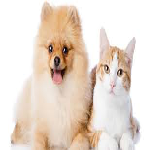

In [122]:
# load an image from file
image = load_img('test.jpg', target_size=(150,150))
image

In [123]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = preprocess_input(test_image)
result = model.predict(test_image)
if result[0][0] >= 0.5:
  prediction = 'Game'
else:
  prediction = 'Pet'
print(prediction)

Pet


In [124]:
train_generator.class_indices

{'gam': 0, 'pet': 1}

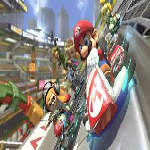

In [125]:
# load an image from file
image = load_img('test2.jpg', target_size=(150,150))
image

In [126]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] >= 0.5:
  prediction = 'Game'
else:
  prediction = 'Pet'
print(prediction)

Game


### Bottleneck features- 대규모 데이터셋에 이미 학습된 기존 네트워크 (convolutional neural network)를 활용- VGG

In [127]:
from keras import applications

def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples// batch_size)
    np.save('bottleneck_features_train.npy', bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples// batch_size)
    np.save('bottleneck_features_validation.npy', bottleneck_features_validation)




In [128]:
def train_top_model():
    train_data = np.load('bottleneck_features_train.npy')
    train_labels = np.array(
        [0] * (len(list1)) + [1] * (len(list2)))

    validation_data = np.load('bottleneck_features_validation.npy')
    validation_labels = np.array(
        [0] * (len(list3)) + [1] * (len(list4)))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    #model.save_weights(top_model_weights_path)



In [129]:
save_bottlebeck_features()


Found 1430 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [130]:
train_top_model()

Train on 1430 samples, validate on 240 samples
Epoch 1/5
1430/1430 [==============================] - 4s 3ms/step - loss: 0.5454 - acc: 0.8224 - val_loss: 0.0981 - val_acc: 0.9583
Epoch 2/5
1430/1430 [==============================] - 3s 2ms/step - loss: 0.1860 - acc: 0.9427 - val_loss: 0.0370 - val_acc: 0.9917
Epoch 3/5
1430/1430 [==============================] - 3s 2ms/step - loss: 0.0961 - acc: 0.9720 - val_loss: 0.0640 - val_acc: 0.9917
Epoch 4/5
1430/1430 [==============================] - 3s 2ms/step - loss: 0.0600 - acc: 0.9818 - val_loss: 0.0467 - val_acc: 0.9875
Epoch 5/5
1430/1430 [==============================] - 3s 2ms/step - loss: 0.0328 - acc: 0.9895 - val_loss: 0.0542 - val_acc: 0.9917


In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
__________

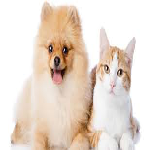

In [132]:
# load an image from file
image = load_img('test.jpg', target_size=(150,150))
image

In [133]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = preprocess_input(test_image)
result = model.predict(test_image)
if result[0][0] >= 0.5:
  prediction = 'Game'
else:
  prediction = 'Pet'
print(prediction)

Pet


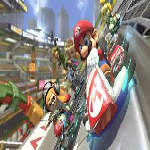

In [134]:
# load an image from file
image = load_img('test2.jpg', target_size=(150,150))
image

In [135]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] >= 0.5:
  prediction = 'Game'
else:
  prediction = 'Pet'
print(prediction)

Game
